# Plotter
Convenience class for visualizing DataFrame and Series objects.

In [1]:
%load_ext autoreload
%autoreload all

In [2]:
from plot import Plotter
from tools import DATADIR, read_csv

## load example data

In [3]:
data = read_csv(DATADIR / 'examples/energy.csv')

# Remove whitespace and caps from column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Consolidate columns
del data['total']
data['hydro'] = data.pop('conv._hydro') + data.pop('ps_hydro')
data['gas'] = data.pop('lfg') + data.pop('natural_gas')

# Sort and filter
data = data.set_index('year').sort_index()
data = data.loc['2000':, data.sum().nlargest(6).index]

print(data.info())
data.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2000 to 2016
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nuclear      17 non-null     int64  
 1   coal         17 non-null     float64
 2   gas          16 non-null     float64
 3   hydro        17 non-null     float64
 4   petroleum    17 non-null     float64
 5   net_imports  17 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 952.0 bytes
None


,nuclear,coal,gas,hydro,petroleum,net_imports
year,,,,,,
2012,40775,4551.0,60198.0,25303.0,580.0,26180.0
2013,44756,4697.0,55182.0,26397.0,1007.0,25694.0
2014,43041,4325.0,55169.0,26823.0,2136.0,22103.0
2015,44620,2046.0,57668.0,26704.0,1892.0,22273.0
2016,41638,1493.0,57541.0,27150.0,643.0,26117.0


## create a Plotter object

In [4]:
canvas = Plotter()
canvas

Plotter(style='bmh')

In [5]:
canvas.style

'bmh'

In [6]:
canvas.params

{'axes': {'frame_on': False},
 'figure': {'clear': True,
  'dpi': 100,
  'edgecolor': None,
  'facecolor': None,
  'figsize': (9, 3),
  'frameon': False,
  'tight_layout': True},
 'legend': {'bbox_to_anchor': (1.05, 1),
  'borderaxespad': 0.0,
  'loc': 'upper left'}}

## create a blank figure or axes

In [25]:
fig = canvas.figure()

<Figure size 900x300 with 0 Axes>

<Axes: >

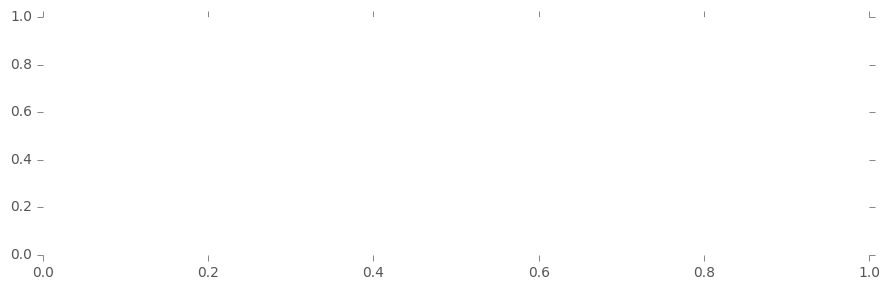

In [26]:
canvas.axes()

## area

<Axes: >

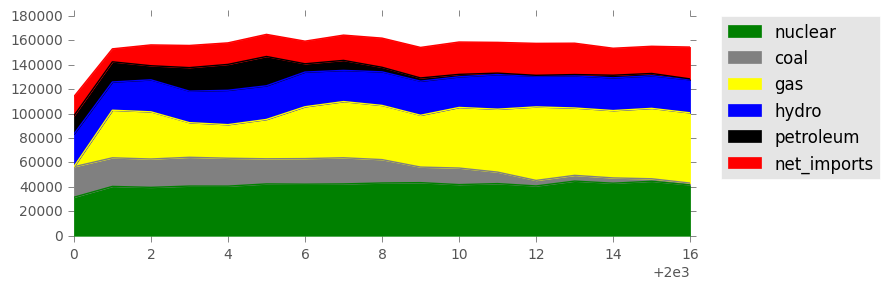

In [34]:
color = "green grey yellow blue black red".split()
canvas.area(data, color=color)

## bar

In [ ]:
help(plot.bar)
plot.bar(data, color=COLOR)

## barh

In [ ]:
help(plot.barh)
plot.barh(data, color=COLOR)

## box

In [ ]:
help(plot.box)
plot.box(data)

## boxh

In [ ]:
help(plot.boxh)
plot.boxh(data)

## density

In [ ]:
help(plot.density)
plot.density(data)

## heat

In [ ]:
help(plot.heat)
plot.heat(data, colorbar=True)

## hist

In [ ]:
help(plot.hist)
plot.hist(data, color=COLOR)

## line

In [ ]:
help(plot.line)
plot.line(data, color=COLOR)

## quant

In [ ]:
help(plot.quant)

In [ ]:
from pandas import Series, to_datetime

ts = data['coal'].copy()
ts.index = to_datetime(data.index, format='%Y')
ts.head()

In [ ]:
plot.quant(ts, '5Y')

## scatter

In [ ]:
help(plot.scatter)

In [ ]:
points = data.stack().reset_index()
points.columns = 'year source energy'.split()
points['color'] = points['source'].map(dict(zip(data.columns, COLOR)))
points['size'] = 200 * data.div(data.sum(axis=1), axis=0).stack().values
points = points['year energy color size'.split()]

points

In [ ]:
plot.scatter(points, xlabel='year', ylabel='GWh')

## modify plot style
*Caution:* This modifies matplotlib.style for **all** plots.

<Axes: >

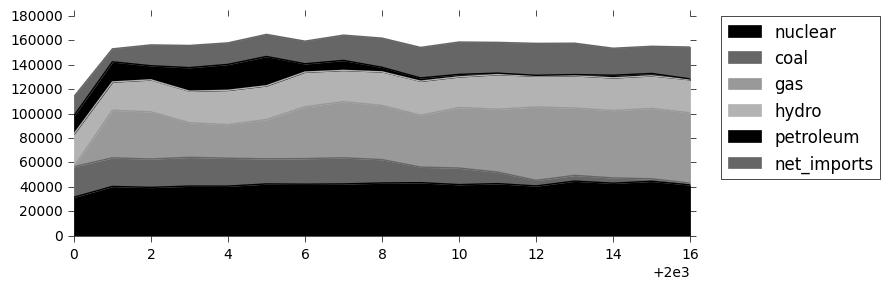

In [36]:
canvas.style = "grayscale"
canvas.area(data)

In [24]:
# Show all available styles
Plotter.styles

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## help

In [ ]:
help(Plot)